# Técnicas Exploratorias en el Análisis de Series de Tiempo

---
## Estructura de datos

**Datos de corte transversal**: son datos recopilados mediante la observación de muchos sujetos (como individuos, empresas o países) al mismo tiempo, o sin tener en cuenta las diferencias en el tiempo.

*   Ejemplo: las ventas durante el mes de enero de 2020 para cada una de las 20 sucursales de una empresa

**Series de tiempo**: es una sucesión de datos de un único sujeto (como un individuo, una empresa o un país) medidos en determinados momentos del tiempo y ordenados cronológicamente.
*   Ejemplo: una serie histórica de las ventas de una
empresa en frecuencia mensual desde enero 2015 a
diciembre 2019

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,388393,290179,260995,179962,141913,140516,202580,176712,183492,206220,229789,309273
2009,432572,304527,236281,215869,157826,139880,171158,160886,175767,211534,235677,317718
2010,441145,290121,190456,180555,170618,142796,195843,188316,196116,234495,255859,314317
2011,429789,305579,296141,231246,190575,171328,224604,197464,216102,250271,277075,347111
2012,490501,387115,300258,278427,218722,192208,261328,249743,241553,264854,299242,370328
2013,484503,350251,356288,252000,210616,197421,258355,252228,240671,290725,308510,374636
2014,490976,354125,333977,254063,228542,193004,270426,251258,244717,302173,312854,438276
2015,560655,432415,370776,313408,263887,284005,331061,294748,300488,360330,401287,565276
2016,730786,599445,510732,374190,320357,301805,440925,370845,403192,456322,474278,657823
2017,964027,709043,521123,469626,357953,322568,491167,480158,442503,481782,517243,692690


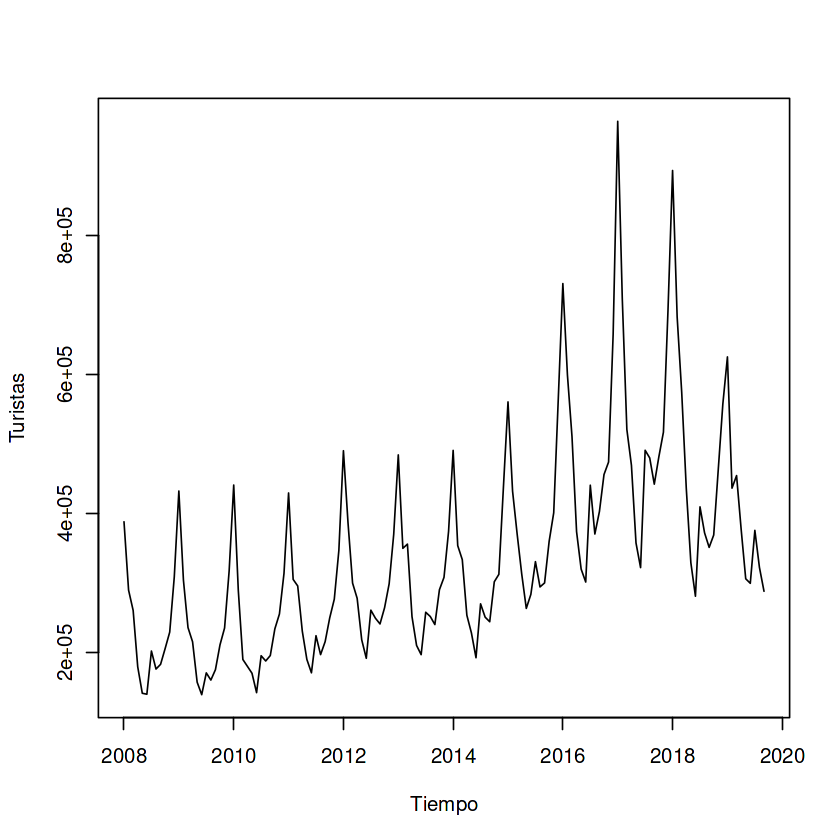

In [11]:
df_turismo <- read.csv("turismo.csv")
turistas <- ts(df_turismo[,1],frequency = 12, start = c(2008, 01))
turistas
plot(turistas, xlab="Tiempo",ylab="Turistas")

## Propósito del análisis de series de tiempo

*   Análisis y modelamiento explicativo: entender el pasado.
*   Pronóstico: predecir el futuro.
  *   Por ejemplo, para predecir demanda.
*   Base para simulaciones de computador:
    *   Por ejemplo, para evaluar el impacto de políticas o regulaciones.
*   Regresión de series de tiempo: los supuesto de mínimos cuadrados ordinarios son violados cuando la variable dependiente e independiente son series de tiempo.
*   Control de calidad y gestión óptima.
  *   Por ejemplo, gestión cuantitativa del riesgo en carteras de inversión.

---

## Elementos esenciales de una serie de tiempo

*   **Dependencia temporal o serial** 🕐
  *   Observaciones cercanas en el tiempo suelen estar correlacionadas.
*   **Tendencia.** 📈
  *   Se refiere al cambio en la media que presenta una serie de tiempo en el largo plazo.
*   **Efectos estacionales** ❄ 🌅
  *   Se refiere a la variación regular de acuerdo a una "temporada" o "estación". Puede ser mensual, anual, diaria, etc.
  *   Suelen ser periódicos y por tanto predecibles.
*   **Variación cíclica** 😖
  *   Oscilaciones de causa desconocida y periódo variable.

**Nuestro objetivo es desarrollar modelos estadísticos para explicar las características de una serie de tiempo**



---

## Notación básica

*   Tiempo discreto: $t = 0, ±1, ±2$
*   Modelo: $\{X_t\}$
  * Aleatorio, función del tiempo .
  * Proceso estocástico o modelo de serie de tiempo
  * Podemos pensarlo como el "proceso generador de datos"
* Data: $\{x_1, \dots, x_n\}$
  * Series de tiempo históricas.
  * Realización de una sequencia de variables aleatorias.

---


## Descomposición de una serie de tiempo 

Formalmente, la descomposición de una serie se representa como:

$$ Y_t = f(S_t, M_t, E_t) $$

Donde $Y_t$ es la serie de tiempo de interés observada en la fecha $t$, $S_t$ es el componente estacional, $M_t$ es el componente tendencia-ciclo y $E_t$ es el componente residual

* Si se asume una forma aditiva, entonces $Y_t = S_t + M_t + E_t$
* Si se asume una forma multiplicativa, entonces $Y_t = S_t \times M_t \times E_t$
* Si se asume un efecto estacional multiplicativo con error aditivo, entonces $Y_t = S_t M_t + E_t$

Por lo general, asumimos que $E_t = Z_t$ donde $Z_t$ es un error de ruido blanco: $Z_t \sim \mathcal{N}(0, \sigma^2)$.
Más adelante veremos que los modelos de series de tiempo involucran un proceso de ruido blanco como el elemento base de su construcción.

Simulemos estos modelos! 🤓

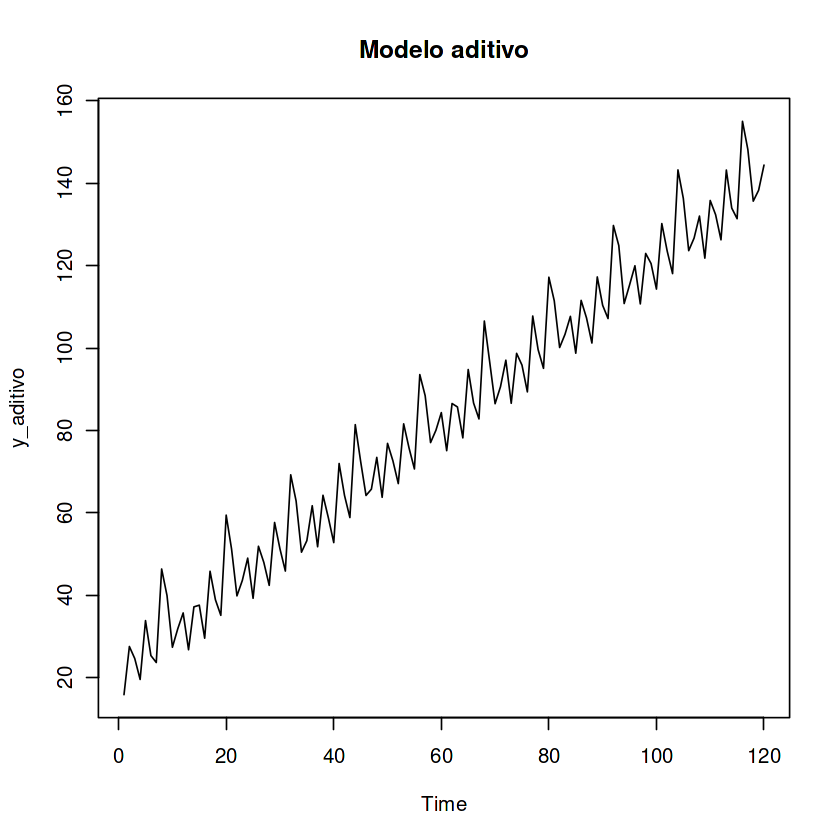

In [14]:
set.seed(2049)
t <- 120
m <- 30+1:t
s <- rep(rnorm(12, sd = 10), 10)
e <- rnorm(t)
y_aditivo <- s + m + e
y_aditivo <- ts(y_aditivo)
plot(y_aditivo, main = "Modelo aditivo")

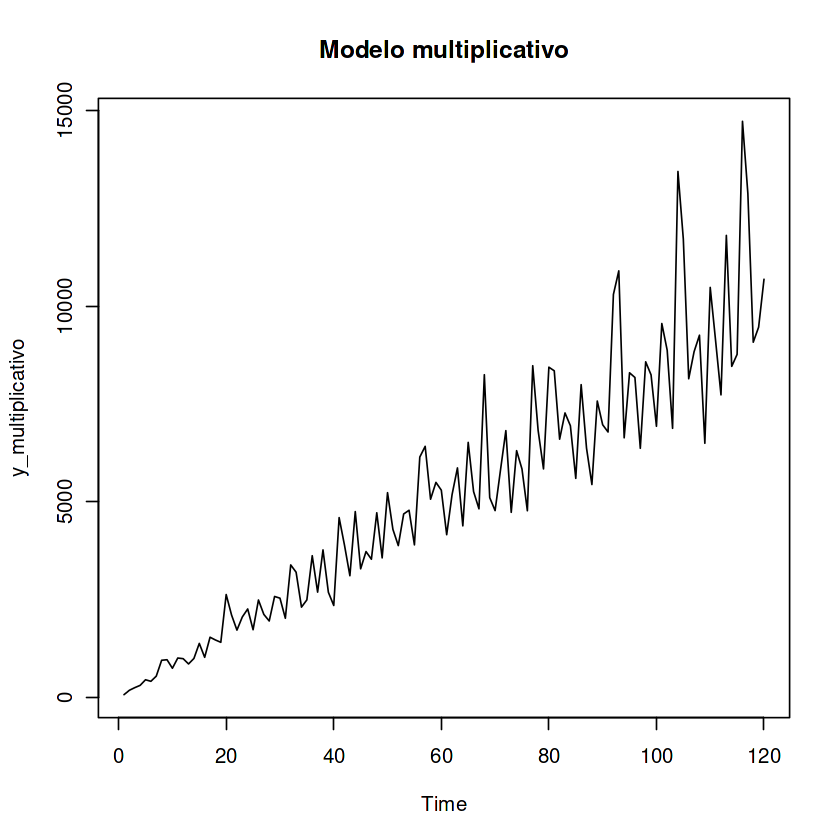

In [8]:
set.seed(2049)
t <- 12*10
m <- 1:t
s <- rep(rnorm(12, mean = 10, sd = 2), t/12)
e <- rnorm(t, mean = 10)
y_multiplicativo <- s*m*e
y_multiplicativo <- ts(y_multiplicativo)
plot(y_multiplicativo, main = "Modelo multiplicativo")

Cuando $Y_t$ es positivo en el contexto de un modelo multiplicativo, se puede transformar la descomposición multiplicativa y recuperar una aditiva aplicando logaritmos:

$$Y_t = S_t \times M_t \times E_t$$
$$\log(Y_t)= \log(S_t) + \log(M_t )+ \log(E_t)$$

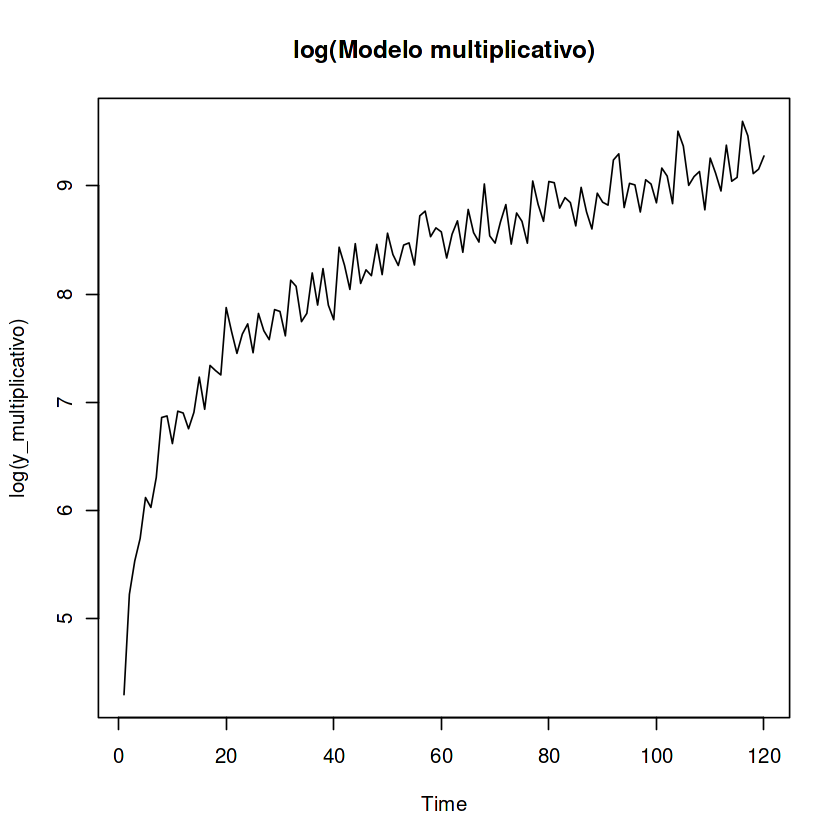

In [9]:
plot(log(y_multiplicativo), main = "log(Modelo multiplicativo)")

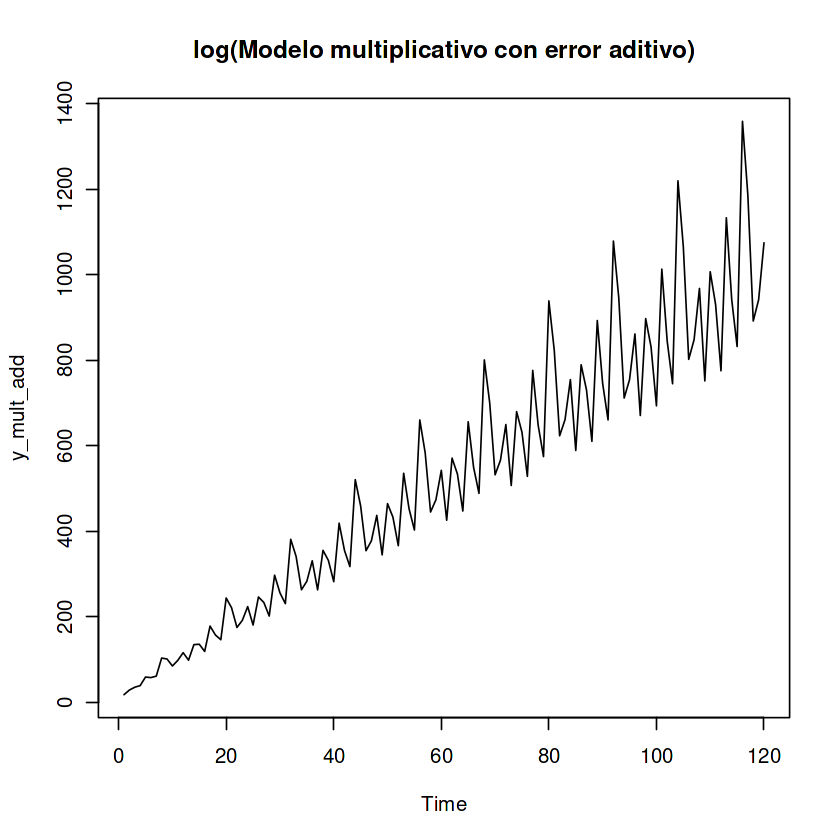

In [7]:
set.seed(2049)
t <- 12*10
m <- 1:t
s <- rep(rnorm(12, mean = 10, sd = 2), t/12)
e <- rnorm(t, mean = 10)
y_mult_add <- s*m + e
y_mult_add <- ts(y_mult_add)
plot(y_mult_add, main = "log(Modelo multiplicativo con error aditivo)")

## ¿Por qué es relevante identificar la estacionalidad de una serie?

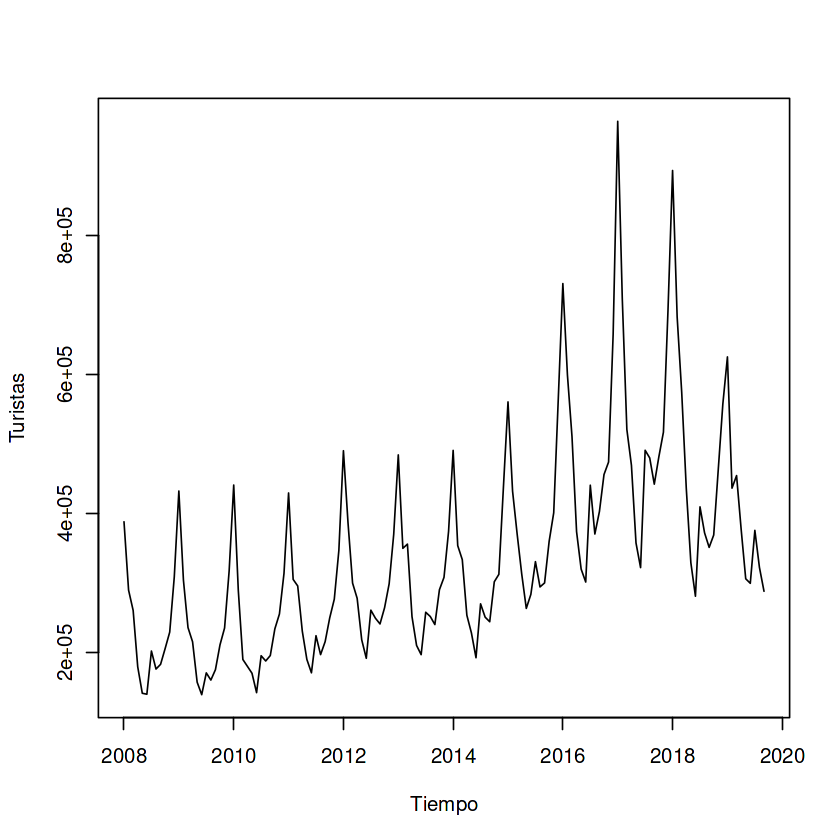

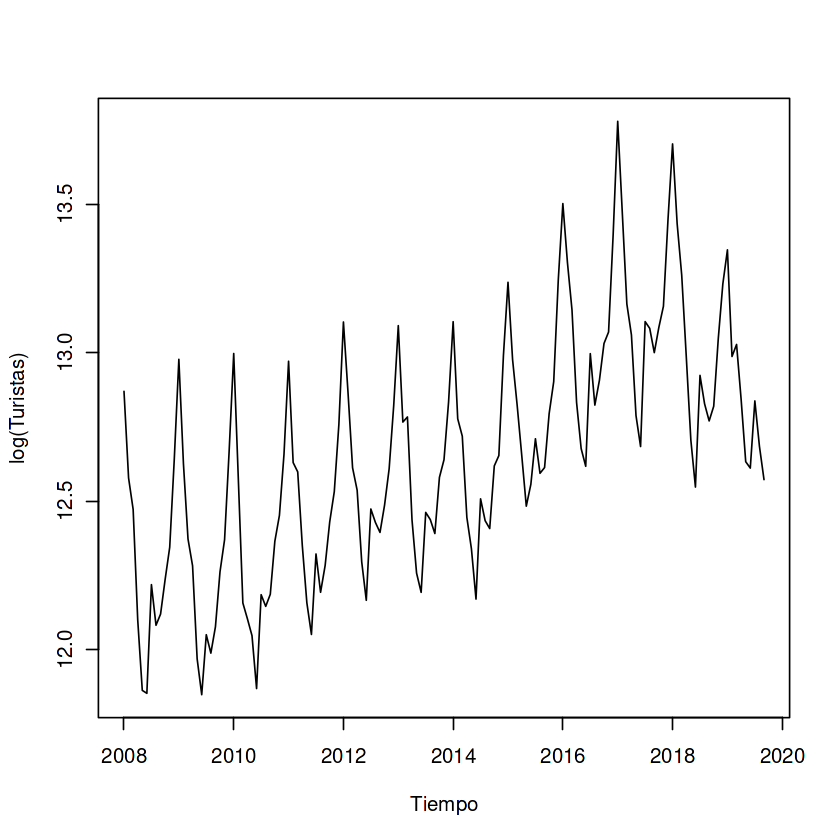

In [12]:
plot(turistas, xlab="Tiempo",ylab="Turistas")
plot(log(turistas), xlab="Tiempo",ylab="log(Turistas)")

Entender el tipo de estacionalidad de la serie es relevante para capturar mejor su tendencia y estacionalidad.

## Métodos simples de suavización de una  de series de tiempo

Una serie de tiempo **suavizada** puede ser obtenida a partir de la serie original $\{y_t\}$ a través de:

$$ \hat{y}_t := \sum_{r = -q}^{s} \omega_r y_{t+r} $$

donde $\{\omega_r\}$ son **pesos** o **ponderadores** que usualmente suman a $1$: $\sum_{r = -q}^{s} \omega_r = 1$ 

La suavización puede ser usada

* Identificar y estimar la tendencia por medio de la reducción de la variación local
* Eliminar el efecto estacional

In [42]:
library(TTR)

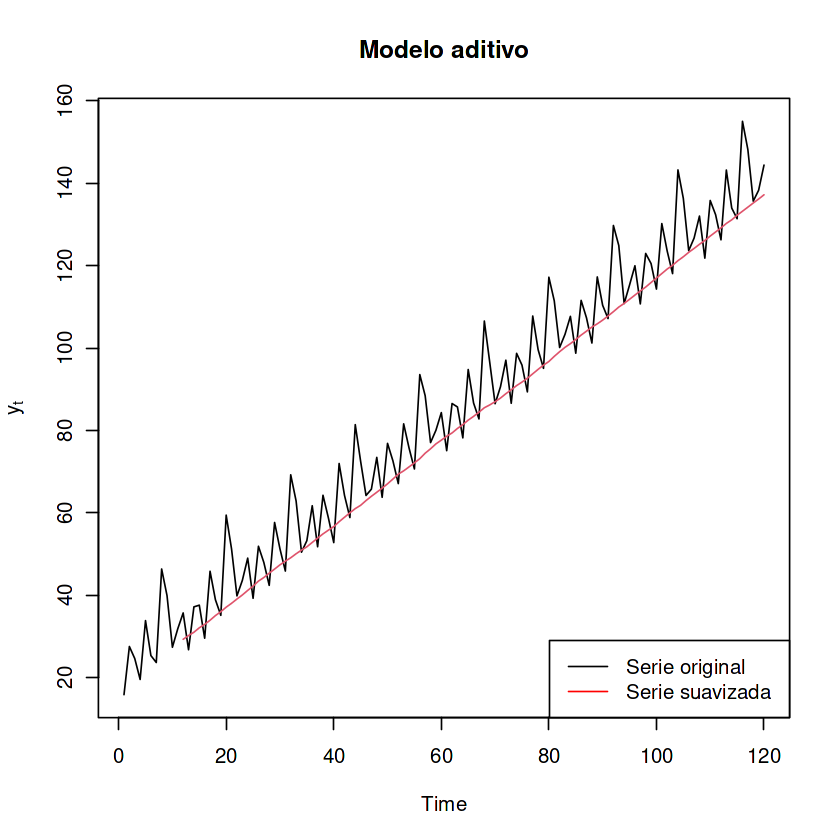

In [54]:
y_trend <- SMA(y_aditivo, n = 12)
plot(y_aditivo, main = "Modelo aditivo", ylab = expression(y[t]))
lines(y_trend, col = 2)
legend(x = "bottomright", 
       legend = c("Serie original", "Serie suavizada"), 
       lty = c(1,1),
       col = c("black", "red"))

Dada una serie de tiempo $